<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Clustering_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "drive/MyDrive/SimilarityScores/2017/SimilarityScores_2017_v2.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
0,0,drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.369211,-0.022437,0.161186,0.551243,0.167648,-0.046671,0.267151,-0.006941,0.357655,0.146508,0.484966,0.512043,0.142315,0.309181,0.755692,0.055968,0.137474,0.054704,0.508805,0.430237,0.200388,0.102973,0.472031,0.309739,0.083764,0.640385,0.353870,0.497351,0.476926,0.059460,-0.038341,0.106213,0.339428,0.354802,-0.184353,0.479967,0.314443,...,0.224676,0.031473,0.268255,0.274292,0.269736,0.636752,-0.003948,-0.291079,0.280610,0.355785,0.235812,0.378112,0.078252,0.158109,0.150763,-0.090740,0.299181,0.015219,0.090565,-0.056327,0.558653,0.325070,-0.071601,0.628126,-0.192992,0.624930,0.166377,0.027237,0.590164,0.170133,0.269295,0.172039,0.322037,0.256002,0.557630,0.585353,0.062470,0.167640,0.156481,-0.078712
1,1,drive/MyDrive/2017_v1/482_1_2017.csv,0.369211,1.000000,0.108172,0.322449,0.481157,0.353481,0.126784,0.475014,0.115094,0.602215,0.349899,0.305101,0.686582,0.232349,0.452886,0.257445,0.076342,0.330815,0.259361,0.284448,0.546656,0.355813,0.237648,0.649843,0.255102,0.278351,0.526006,0.298831,0.477452,0.566592,0.

In [ ]:
arr = df.copy()

In [ ]:
arr = arr.drop(["Unnamed: 0",'Unnamed: 0.1'],axis=1)

In [ ]:
cols = arr.columns

In [ ]:
cols = list(cols)

In [ ]:
corr = np.array(arr)

In [ ]:
corr

array([[ 1.        ,  0.36921099, -0.02243684, ...,  0.16763962,
         0.15648125, -0.07871199],
       [ 0.36921099,  1.        ,  0.10817177, ...,  0.1179799 ,
         0.13728883,  0.06995785],
       [-0.02243684,  0.10817177,  1.        , ...,  0.35289907,
         0.13477391,  0.44731504],
       ...,
       [ 0.16763962,  0.1179799 ,  0.35289907, ...,  1.        ,
         0.1495801 ,  0.33474249],
       [ 0.15648125,  0.13728883,  0.13477391, ...,  0.1495801 ,
         1.        ,  0.12293685],
       [-0.07871199,  0.06995785,  0.44731504, ...,  0.33474249,
         0.12293685,  1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

1

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

78

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

38

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

6

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

31

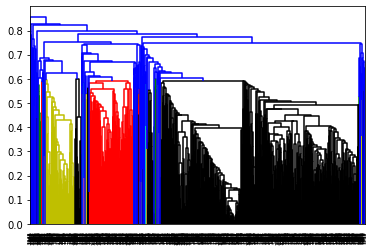

In [ ]:
den = dendrogram(hierarchy)

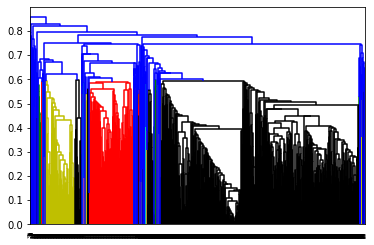

In [ ]:
den = dendrogram(hierarchy,labels=labels)

In [ ]:
from collections import defaultdict

In [ ]:
clusters = defaultdict(list)

In [ ]:
for i,val in enumerate(labels):
  clusters[val].append(cols[i])

In [ ]:
clusters

defaultdict(list,
            {1: ['drive/MyDrive/2017_v1/184_0_2017.csv',
              'drive/MyDrive/2017_v1/240_1_2017.csv'],
             2: ['drive/MyDrive/2017_v1/46_0_2017.csv',
              'drive/MyDrive/2017_v1/759_0_2017.csv'],
             3: ['drive/MyDrive/2017_v1/1118_0_2017.csv'],
             4: ['drive/MyDrive/2017_v1/768_1_2017.csv'],
             5: ['drive/MyDrive/2017_v1/1204_1_2017.csv'],
             6: ['drive/MyDrive/2017_v1/759_1_2017.csv'],
             7: ['drive/MyDrive/2017_v1/93_1_2017.csv',
              'drive/MyDrive/2017_v1/93_0_2017.csv'],
             8: ['drive/MyDrive/2017_v1/1760_0_2017.csv'],
             9: ['drive/MyDrive/2017_v1/500_1_2017.csv'],
             10: ['drive/MyDrive/2017_v1/83_1_2017.csv',
              'drive/MyDrive/2017_v1/83_0_2017.csv'],
             11: ['drive/MyDrive/2017_v1/1752_1_2017.csv',
              'drive/MyDrive/2017_v1/194_0_2017.csv',
              'drive/MyDrive/2017_v1/522_0_2017.csv',
              'drive

In [ ]:
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:26 len:942
cluster:14 len:192
cluster:17 len:230
cluster:29 len:14
cluster:27 len:4
cluster:12 len:11
cluster:11 len:5
cluster:8 len:1
cluster:20 len:14
cluster:25 len:2
cluster:15 len:5
cluster:19 len:4
cluster:1 len:2
cluster:16 len:6
cluster:28 len:7
cluster:2 len:2
cluster:7 len:2
cluster:21 len:4
cluster:13 len:1
cluster:23 len:2
cluster:9 len:1
cluster:18 len:1
cluster:24 len:3
cluster:30 len:1
cluster:22 len:3
cluster:6 len:1
cluster:3 len:1
cluster:4 len:1
cluster:5 len:1
cluster:10 len:2
cluster:31 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)

In [ ]:
df["cluster"] = -1

In [ ]:
df

,vSegID,vSegDir,longitude,latitude,cluster
0,100,0,41.032530,28.936566,-1
1,100,1,41.025294,28.929550,-1
2,101,0,41.025396,28.929454,-1
3,101,1,41.018156,28.922682,-1
4,1026,1,40.990926,28.679818,-1
...,...,...,...,...,...
1461,99,0,41.040595,28.940399,-1
1462,99,1,41.032445,28.936590,-1
1463,9,0,40.954825,29.083659,-1
1464,2083,0,40.998055,28.933086,-1


In [ ]:
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

In [ ]:
df

,vSegID,vSegDir,longitude,latitude,cluster
0,100,0,41.032530,28.936566,26
1,100,1,41.025294,28.929550,26
2,101,0,41.025396,28.929454,26
3,101,1,41.018156,28.922682,26
4,1026,1,40.990926,28.679818,17
...,...,...,...,...,...
1461,99,0,41.040595,28.940399,26
1462,99,1,41.032445,28.936590,26
1463,9,0,40.954825,29.083659,17
1464,2083,0,40.998055,28.933086,14


In [ ]:
df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/ClusterCoordinates_2017.csv")